# Model-based Approach

Please change all file directories to your own local directories

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import data

In [ ]:
import pandas as pd 
import numpy as np 

!pip install stargazer
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

# visualization and standard library packages
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from tqdm import tqdm
from collections import Counter

%matplotlib inline

In [ ]:
file_dir = '/content/drive/MyDrive/Colab Notebooks/30200_analysis/30200-balanced/all_comments_with_pred.csv'
comments = pd.read_csv(file_dir, index_col='index')
comments

,comment_time,movie_id,rating,content,user_md5,votes,label,pred_label,pred_score,adjusted_pred
index,,,,,,,,,,
0,2005-06-12 02:22:07,1291581,4.0,平安夜跟小白看了粤语版，驴子的台词再创造得很可爱。,4d69f002306f819034976e3818a84908,6,1,1,0.979538,1
1,2005-06-12 02:22:07,1291856,4.0,http://www.bighead.cn/?p=15,4d69f002306f819034976e3818a84908,19,1,1,0.777176,0
2,2005-06-12 02:22:07,1291582,5.0,20061118跟小白重看了一遍。,4d69f002306f819034976e3818a84908,0,1,1,0.942424,1
3,2005-06-12 02:22:07,1291832,5.0,我爱特拉沃塔的舞。,4d69f002306f819034976e3818a84908,1590,1,1,0.967151,1
4,2005-06-12 02:22:09,1292210,4.0,重看依然很喜欢很喜欢,6c0f657ba0d8600e45f323e65a8de516,0,1,1,0.996046,1
...,...,...,...,...,...,...,...,...,...,...
4428447,2019-09-07 15:57:07,27063867,2.0,就很尬，很无聊，笑点好无语，朱亚文为什么要接这样的片子啊………,79a5045cc0cce798c046b84a56578d6d,0,0,0,0.997945,-1
4428448,2019-09-07 15:58:03,27063867,2.0,吃了感冒药去看的，困上加困。朱亚文是想通过这部作品来拓宽戏路吗？,fed2dab59d6797ad2c3838091a1288b8,0,0,0,0.994440,-1
4428449,2019-09-07 15:58:51,27063867,2.0,有些地方还是很好笑的，奔着两位主演去看，他们也确实有范儿，倒数第二场戏，两人穿礼服去办公室真...,32b9368b0d6edac78eed1049434f765b,0,0,0,0.853904,-1


In [ ]:
Counter(comments['adjusted_pred'])

Counter({-1: 1174856, 0: 1264962, 1: 1988634})

## Get sentiment statistics

### Overall Senitment

In [ ]:
comments['comment_time'] = pd.to_datetime(comments['comment_time'])
comments = comments.set_index('comment_time').sort_index()
comments_count = comments['content'].groupby(comments.index.year).count().tolist()                  

In [ ]:
def get_sentiment_by_year(comments, comments_count):
    '''
    get sentiment trend by year. 
    '''
    cur = 0
    year = 2005
    dic = {}
    total_users_dic = {}
    for year_num in comments_count:
        pos = 0
        neu = 0
        neg = 0
        
        # comments with ratings 
        sentiment_lst = []
        users_dic = {}
        for sentiment, md5 in tqdm(zip(comments.iloc[cur: cur + year_num]['adjusted_pred'], 
                          comments.iloc[cur: cur + year_num]['user_md5'])):
            # users_info in one year
            if md5 not in users_dic:
                users_dic[md5] = 0
            users_dic[md5] += 1
            
            # all users_info
            if md5 not in total_users_dic:
                total_users_dic[md5] = 0
            total_users_dic[md5] += 1
            
            
            if sentiment == 1:
                pos += 1
                sentiment_lst.append(sentiment)
            elif sentiment == 0:
                neu += 1
                sentiment_lst.append(sentiment)
            else:
                neg += 1
                sentiment_lst.append(sentiment)
        
        # cal proportion
        pos_portion = pos/year_num
        neu_portion = neu/year_num
        neg_portion = neg/year_num
        
        # cal mean and std of sentiment 
        sentiment_mean = np.array(sentiment_lst).mean()
        sentiment_std = np.array(sentiment_lst).std()
        
        
        dic[year] = [pos, neu, neg, 
                    pos_portion, neu_portion, neg_portion,
                    sentiment_mean, sentiment_std]
        cur += year_num
        year += 1
    return dic, total_users_dic

In [ ]:
dic, user_dic = get_sentiment_by_year(comments, comments_count)

1603it [00:00, 873631.67it/s]
13596it [00:00, 951507.66it/s]
34985it [00:00, 866885.60it/s]
92789it [00:00, 788007.88it/s]
142995it [00:00, 776300.72it/s]
261817it [00:00, 728588.88it/s]
355512it [00:00, 701501.73it/s]
377017it [00:00, 648696.91it/s]
312147it [00:00, 661755.41it/s]
270202it [00:00, 651512.92it/s]
268842it [00:00, 654206.71it/s]
344790it [00:00, 623636.89it/s]
453415it [00:00, 622985.47it/s]
563920it [00:00, 619739.01it/s]
934822it [00:01, 591807.32it/s]


In [ ]:
df = pd.DataFrame(dic, index = ['positive','neutral', 'negative',
                               'positive_portion','neutral_portion', 'negative_portion',
                               'sentiment_mean', 'sentiment_std'])
x = df.columns
df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
positive,809.000000,6847.000000,17111.000000,43875.000000,64827.000000,119052.000000,160674.000000,168293.000000,133579.000000,113492.000000,111341.000000,148000.000000,199083.000000,248540.000000,453111.000000
neutral,590.000000,4463.000000,11391.000000,29978.000000,46247.000000,81259.000000,105558.000000,109663.000000,90128.000000,76301.000000,75034.000000,94660.000000,123414.000000,154222.000000,262054.000000
negative,204.000000,2286.000000,6483.000000,18936.000000,31921.000000,61506.000000,89280.000000,99061.000000,88440.000000,80409.000000,82467.000000,102130.000000,130918.000000,161158.000000,219657.000000
positive_portion,0.504679,0.503604,0.489095,0.472847,0.453352,0.454715,0.451951,0.446380,0.427936,0.420026,0.414150,0.429247,0.439075,0.440736,0.484703
neutral_portion,0.368060,0.328258,0.325597,0.323077,0.323417,0.310366,0.296918,0.290870,0.288736,0.282385,0.279101,0.274544,0.272188,0.273482,0.280325
negative_portion,0.127261,0.168138,0.185308,0.204076,0.223232,0.234920,0.251131,0.262749,0.283328,0.297588,0.306749,0.296209,0.288738,0.285782,0.234972
sentiment_mean,0.377417,0.335466,0.303787,0.268771,0.230120,0.219795,0.200820,0.183631,0.144608,0.122438,0.107401,0.133038,0.150337,0.154955,0.249731
sentiment_std,0.699640,0.747799,0.762966,0.777615,0.789701,0.800827,0.814096,0.821833,0.830875,0.838227,0.842238,0.841283,0.839768,0.838157,0.810746


In [ ]:
year_info = {'year':comments.index.year}
comments['year'] = year_info['year']
comments

,movie_id,rating,content,user_md5,votes,label,pred_label,pred_score,adjusted_pred,year
comment_time,,,,,,,,,,
2005-06-12 02:22:07,1291581,4.0,平安夜跟小白看了粤语版，驴子的台词再创造得很可爱。,4d69f002306f819034976e3818a84908,6,1,1,0.979538,1,2005
2005-06-12 02:22:07,1291856,4.0,http://www.bighead.cn/?p=15,4d69f002306f819034976e3818a84908,19,1,1,0.777176,0,2005
2005-06-12 02:22:07,1291582,5.0,20061118跟小白重看了一遍。,4d69f002306f819034976e3818a84908,0,1,1,0.942424,1,2005
2005-06-12 02:22:07,1291832,5.0,我爱特拉沃塔的舞。,4d69f002306f819034976e3818a84908,1590,1,1,0.967151,1,2005
2005-06-12 02:22:09,1292210,4.0,重看依然很喜欢很喜欢,6c0f657ba0d8600e45f323e65a8de516,0,1,1,0.996046,1,2005
...,...,...,...,...,...,...,...,...,...,...
2019-09-07 15:57:07,27063867,2.0,就很尬，很无聊，笑点好无语，朱亚文为什么要接这样的片子啊………,79a5045cc0cce798c046b84a56578d6d,0,0,0,0.997945,-1,2019
2019-09-07 15:58:03,27063867,2.0,吃了感冒药去看的，困上加困。朱亚文是想通过这部作品来拓宽戏路吗？,fed2dab59d6797ad2c3838091a1288b8,0,0,0,0.994440,-1,2019
2019-09-07 15:58:51,27063867,2.0,有些地方还是很好笑的，奔着两位主演去看，他们也确实有范儿，倒数第二场戏，两人穿礼服去办公室真...,32b9368b0d6edac78eed1049434f765b,0,0,0,0.853904,-1,2019


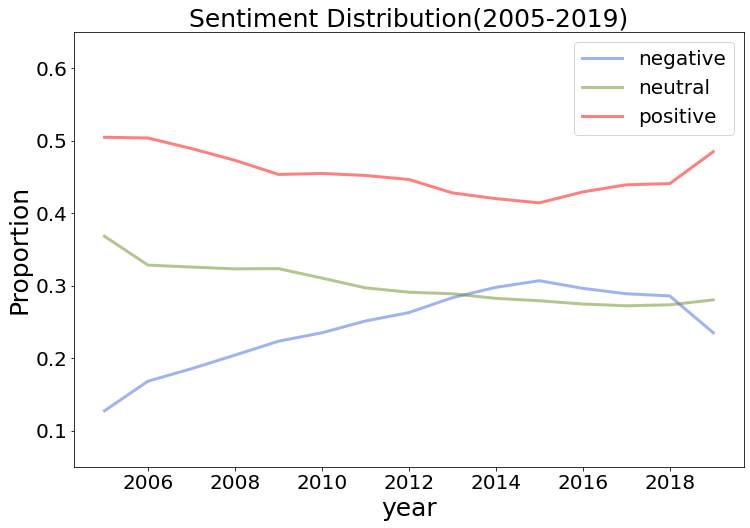

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(x, 
        df.loc['negative_portion', :],
        c='royalblue', 
        linewidth=3,
        alpha=0.5,
        label='negative')

ax.plot(x, 
        df.loc['neutral_portion', :],
        c='olivedrab', 
        linewidth=3,
        alpha=0.5,
        label='neutral')

ax.plot(x, 
        df.loc['positive_portion', :],
        linewidth=3,
        alpha=0.5,
        color='red', label='positive')

plt.title("Sentiment Distribution(2005-2019)",fontsize=25)
plt.ylabel('Proportion',fontsize=25)
plt.xlabel('year',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim([0.05, 0.65])
plt.legend(loc = 'upper right', fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/sentiment_distribution_2005_2019.png')

In [ ]:
comments_plt = comments.reset_index()

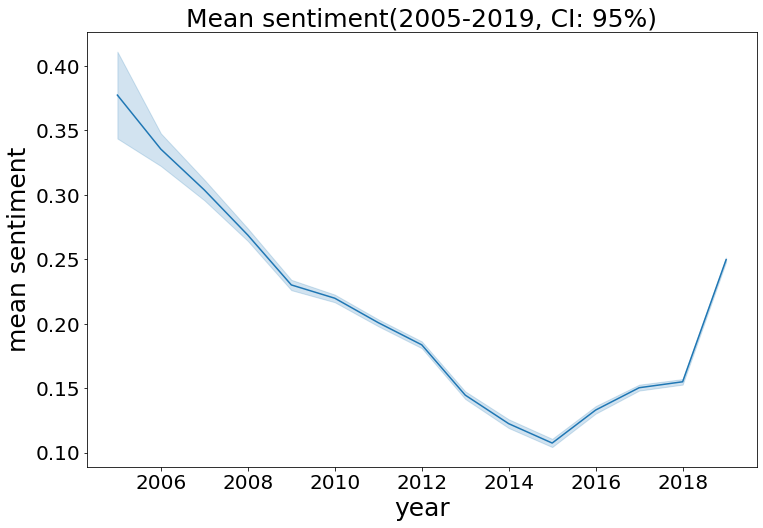

In [ ]:
# default CI: 95%
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(x="year",y="adjusted_pred",
             data=comments_plt,
             ci=95)

plt.title("Mean sentiment(2005-2019, CI: 95%)",fontsize=25)
plt.ylabel('mean sentiment', fontsize=25)
plt.xlabel('year',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/mean_sentiment_2005_2019.png')

### Comparsion between popular and less popular movies

In [ ]:
movie_dic = {}
for idx, row in tqdm(comments.iterrows()):
    if row['movie_id'] not in movie_dic:
        movie_dic[row['movie_id']] = 0
    movie_dic[row['movie_id']] += 1

4428452it [04:05, 18036.17it/s]


In [ ]:
popular_movies = 0
comments_from_popular = 0
for v in tqdm(movie_dic.values()):
    if v >=220:
        popular_movies +=1
        comments_from_popular += v

"%i popular movies"%popular_movies, '%i comments from popular movies'%comments_from_popular

100%|██████████| 68887/68887 [00:00<00:00, 2470505.41it/s]


('6489 popular movies', '1662124 comments from popular movies')

In [ ]:
movie_popularity = []
for idx, row in tqdm(comments.iterrows()):
    if movie_dic[row['movie_id']] >= 220:
        movie_popularity.append('popular')
    else:
        movie_popularity.append('less popular')

4428452it [03:43, 19783.10it/s]


In [ ]:
comments_movie = pd.concat([comments, 
                            pd.DataFrame({'popularity':movie_popularity},
                                         index=comments.index)], axis=1)

In [ ]:
comments_movie_plt = comments_movie.reset_index()

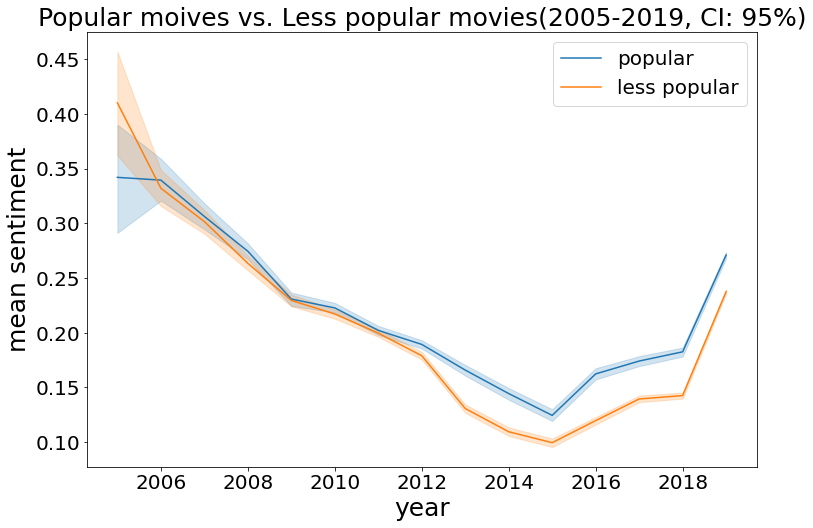

In [ ]:
# default CI: 95%
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(x="year",y="adjusted_pred",
             data=comments_movie_plt,
             hue="popularity",
             hue_order=['popular', 'less popular'],
             ci=95)
plt.title("Popular moives vs. Less popular movies(2005-2019, CI: 95%)", fontsize=25)
plt.ylabel('mean sentiment',fontsize=25)
plt.xlabel('year',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/mean_sentiment_comparison_2005_2019.png')

## User-level analysis

In [ ]:
"95 percenitle user's number of comments is %.1f"% np.percentile(list(user_dic.values()), 95)

"95 percenitle user's number of comments is 22.0"

In [ ]:
threshold_comments = int(np.percentile(list(user_dic.values()), 95))

In [ ]:
is_active = []
for idx, row in tqdm(comments.iterrows()):
    if user_dic[row['user_md5']] >= threshold_comments: 
        is_active.append('active')
    elif user_dic[row['user_md5']] == 1:
        is_active.append('least active')
    else:
        is_active.append('less active')

4428452it [03:56, 18743.74it/s]


In [ ]:
user_info = pd.DataFrame({'active_state':is_active}, index=comments.index)

In [ ]:
comments_user = pd.concat([comments, user_info], axis=1)

### Sentiment disparity

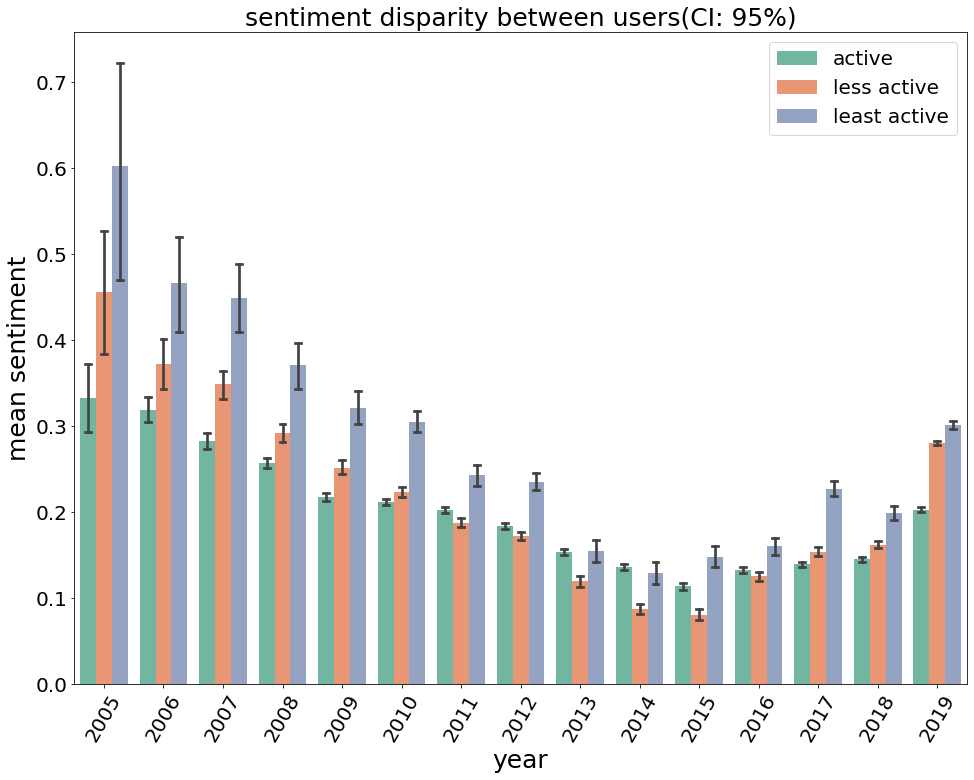

In [ ]:
# default CI: 95%
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.barplot(x="year",y="adjusted_pred",
            data=comments_user,
            hue="active_state",
            hue_order=['active', 'less active', 'least active'],
            ci=95,
            capsize=.1,
            palette="Set2")
plt.title("sentiment disparity between users(CI: 95%)", fontsize=25)
plt.ylabel('mean sentiment',fontsize=25)
plt.xlabel('year',fontsize=25)

plt.xticks(rotation=60,fontsize=20);
plt.yticks(fontsize=20);
plt.legend(loc = 'upper right',fontsize=20);
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/sentiment_disparity_2005_2019.png')

### Comparison with user life-cycle

##### basic check

In [ ]:
# note that this dataframe has been sorted in chronological order. 
time_period = []
user_appearance_dic = {}

for _, row in tqdm(comments.iterrows()):
    if row['user_md5'] not in user_appearance_dic:
        user_appearance_dic[row['user_md5']] = 0
    user_appearance_dic[row['user_md5']] += 1
    
    if user_appearance_dic[row['user_md5']] <= int(user_dic[row['user_md5']]/2):
        time_period.append('first stage')
    else:
        time_period.append('second stage')

4428452it [04:45, 15509.05it/s]


In [ ]:
comments_user['stage'] = time_period

In [ ]:
active_mask = (comments_user['active_state'] == 'active')
user_score = {}
for _, row in tqdm(comments_user[active_mask].iterrows()):
    if row['user_md5'] not in user_score:
        user_score[row['user_md5']] = [[], []]
    
    if row['stage'] == 'first stage':
        user_score[row['user_md5']][0].append(row['adjusted_pred']) 
    if row['stage'] == 'second stage':
        user_score[row['user_md5']][1].append(row['adjusted_pred']) 

2709854it [03:04, 14671.50it/s]


In [ ]:
user_score_diff = {}
for user, score_lst in tqdm(user_score.items()):
    user_score_diff[user] = sum(score_lst[0])/len(score_lst[0]) - sum(score_lst[1])/len(score_lst[1])

100%|██████████| 32464/32464 [00:00<00:00, 295451.58it/s]


In [ ]:
"Sentiment in first stage is on average %.4f higher than that in second stage for all active users"%np.nanmean(np.array(list(user_score_diff.values())))

'Sentiment in first stage is on average 0.0160 higher than that in second stage for all active users'

In [ ]:
avg_num_comments_be_pos = 0
be_pos_count = 0
avg_num_comments_be_neg = 0
be_neg_count = 0
for user, score_diff in tqdm(user_score_diff.items()):
    # become negative
    if score_diff > 0:
        avg_num_comments_be_neg += user_dic[user]
        be_neg_count += 1
    # become positive
    if score_diff < 0:
        avg_num_comments_be_pos += user_dic[user]
        be_pos_count += 1
avg_num_comments_be_pos /= be_pos_count
avg_num_comments_be_neg /= be_neg_count

print("%i users tend to be negative in the second stage"%be_neg_count)
print("%i users tend to bd positive in the second stage"%be_pos_count)
print("Among acitve users:")
print("Users tend to be negative in the second stage have %.3f comments in average;"%avg_num_comments_be_neg)
print("Users tend to be postive in the second stage have %.3f comments in average."%avg_num_comments_be_pos)

100%|██████████| 32464/32464 [00:00<00:00, 842640.01it/s]

16626 users tend to be negative in the second stage
14669 users tend to bd positive in the second stage
Among acitve users:
Users tend to be negative in the second stage have 91.759 comments in average;
Users tend to be postive in the second stage have 77.072 comments in average.


#### Regression of sentiment change as a function of comments

In [ ]:
users = []
num_comments = []
score_change = []

for user, score in user_score_diff.items():
    users.append(user)
    num_comments.append(user_dic[user])
    score_change.append(score)
    
dic_for_reg = {'user_md5':users,
               'number_of_comments':num_comments,
               'sentiment_change':score_change}
df_user_change = pd.DataFrame(dic_for_reg)

In [ ]:
df_user_change['sentiment_change'] = -df_user_change['sentiment_change'] 

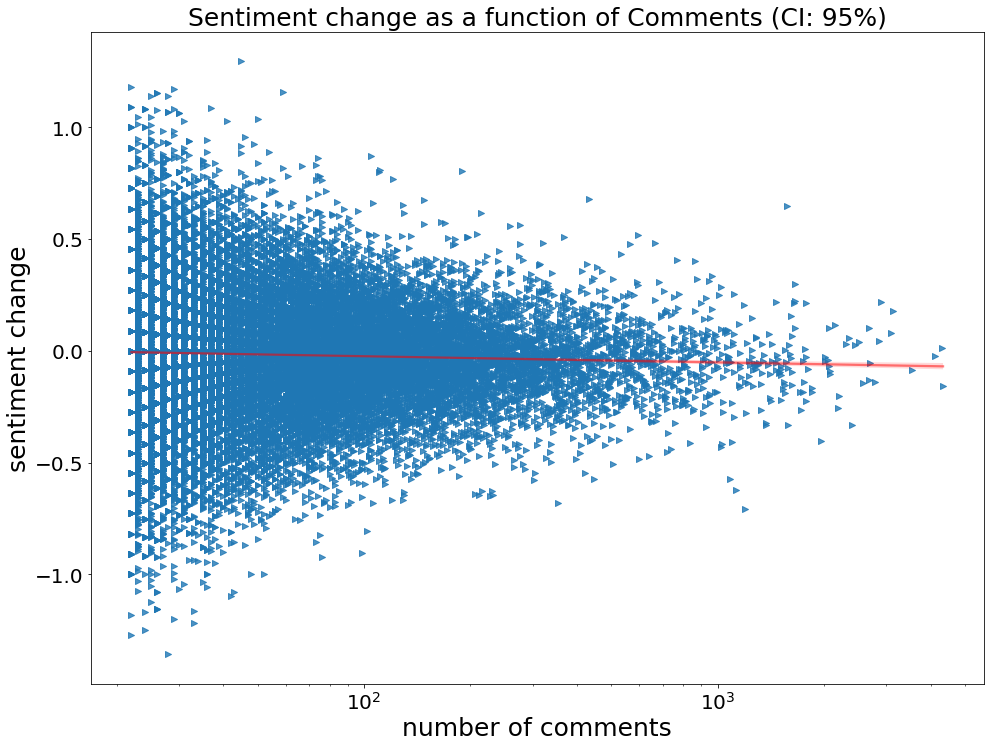

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.regplot(x='number_of_comments', 
            logx=True,
            y='sentiment_change', 
            data=df_user_change,
            ci=95,
            fit_reg=True,
            scatter=True,
            label=True,
            line_kws={'color':'red',
                     'alpha':0.5},
            marker=">")
plt.title("Sentiment change as a function of Comments (CI: 95%)",fontsize=25)
plt.xscale('log')
plt.ylabel('sentiment change',fontsize=25)
plt.xlabel('number of comments',fontsize=25)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/regression_of_sentiment_change.png')

In [ ]:
X = np.log(np.array(df_user_change['number_of_comments'])).reshape(-1,1)
df_user_change['log comments'] = X
df_user_change

,user_md5,number_of_comments,sentiment_change,log comments
0,4d69f002306f819034976e3818a84908,320,-0.162500,5.768321
1,6c0f657ba0d8600e45f323e65a8de516,30,-0.000000,3.401197
2,17739145eb2c9f82586e72225de046a3,62,-0.000000,4.127134
3,88ade831007b8f94deb739d335f4a5d0,95,0.056294,4.553877
4,6e8a7940a8a008cefa3b34dedeeaa5d6,162,0.246914,5.087596
...,...,...,...,...
32459,5907f83106b8215d7456f45a4302582e,95,0.311613,4.553877
32460,700192854e25b9c3b8dc023b5c73e6e4,28,-0.571429,3.332205
32461,f59242d98372c4c99de257ecd036f5a3,31,-0.237500,3.433987
32462,eea631d69582e631d35628b2bd27dd30,32,0.187500,3.465736


In [ ]:
est = sm.OLS(endog=df_user_change['sentiment_change'], exog=sm.add_constant(df_user_change['log comments'])).fit()

stargazer = Stargazer([est])
stargazer.show_model_numbers(False)
stargazer.significant_digits(3)
stargazer.show_confidence_intervals(True)
stargazer.show_degrees_of_freedom(False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable:}} \
\cr \cline{1-2}
\hline \\[-1.8ex]
 const & 0.032$^{***}$ \\
  & (0.016 , 0.048) \\
 log comments & -0.012$^{***}$ \\
  & (-0.016 , -0.008) \\
\hline \\[-1.8ex]
 Observations & 32,464 \\
 $R^2$ & 0.001 \\
 Adjusted $R^2$ & 0.001 \\
 Residual Std. Error & 0.284  \\
 F Statistic & 36.191$^{***}$  \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


#### Sentiment change by year

In [ ]:
user_mask =(comments_user['active_state'] == 'active')

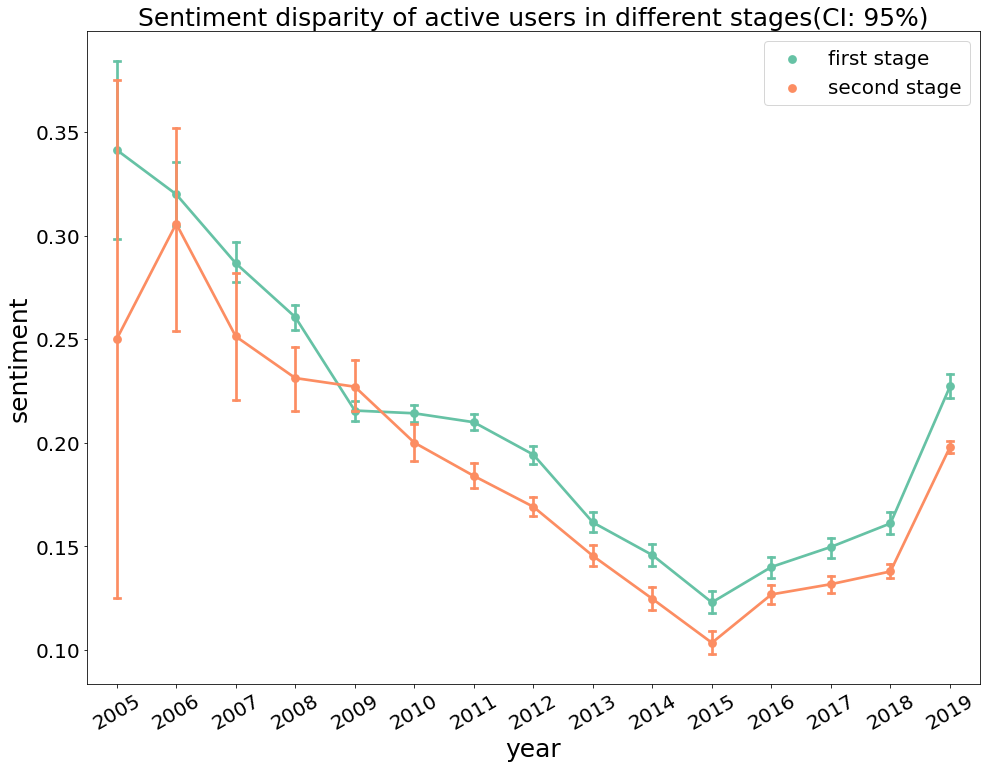

In [ ]:
# default CI: 95%
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.pointplot(x="year",y="adjusted_pred",
            data=comments_user[user_mask],
            ci=95,
            hue="stage",
            hue_order=['first stage', 'second stage'],
            capsize=.1,
            palette="Set2")
plt.title("Sentiment disparity of active users in different stages(CI: 95%)",fontsize=25)
plt.ylabel('sentiment',fontsize=25)
plt.xlabel('year',fontsize=25)

plt.xticks(rotation=30, fontsize=20);
plt.yticks(fontsize=20);
plt.legend(loc = 'upper right',fontsize=20);
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/sentiment_user_difference_stage_change_2005_2019.png')

Under the hood of average results may hide intersing subgroup patterns. So let's visualize the sentiment distribution in first stage and second stage. 

In [ ]:
fisrt_stage_mask = (comments_user['active_state'] == 'active') & (comments_user['stage'] == 'first stage')
second_stage_mask = (comments_user['active_state'] == 'active') & (comments_user['stage'] == 'second stage')

In [ ]:
comments_user_count_first = comments_user[fisrt_stage_mask]['content'].groupby(comments_user[fisrt_stage_mask].index.year).count().tolist()                     
dic_user_first, _ = get_sentiment_by_year(comments_user[fisrt_stage_mask], comments_user_count_first)
df_user_first = pd.DataFrame(dic_user_first, index = ['positive','neutral', 'negative',
                               'positive_portion','neutral_portion', 'negative_portion',
                               'sentiment_mean', 'sentiment_std'])
x = df_user_first.columns

1002it [00:00, 904777.74it/s]
9672it [00:00, 999785.79it/s]
23516it [00:00, 958367.37it/s]
59319it [00:00, 825027.59it/s]
85454it [00:00, 836921.62it/s]
145346it [00:00, 815972.52it/s]
179113it [00:00, 833350.20it/s]
141344it [00:00, 793763.46it/s]
111895it [00:00, 768115.51it/s]
96391it [00:00, 758539.40it/s]
94280it [00:00, 748264.31it/s]
102578it [00:00, 712098.19it/s]
123033it [00:00, 733833.81it/s]
106363it [00:00, 686054.74it/s]
67692it [00:00, 801343.55it/s]


In [ ]:
comments_user_count_second = comments_user[second_stage_mask]['content'].groupby(comments_user[second_stage_mask].index.year).count().tolist()                     
dic_user_second, _ = get_sentiment_by_year(comments_user[second_stage_mask], comments_user_count_second)
df_user_second = pd.DataFrame(dic_user_second, index = ['positive','neutral', 'negative',
                               'positive_portion','neutral_portion', 'negative_portion',
                               'sentiment_mean', 'sentiment_std'])

112it [00:00, 533214.58it/s]
736it [00:00, 516740.50it/s]
2515it [00:00, 980724.67it/s]
8902it [00:00, 966972.11it/s]
16845it [00:00, 826322.48it/s]
33580it [00:00, 859894.67it/s]
70034it [00:00, 865250.48it/s]
105635it [00:00, 814633.48it/s]
96936it [00:00, 777351.73it/s]
85469it [00:00, 768501.66it/s]
86002it [00:00, 746705.58it/s]
122027it [00:00, 759635.86it/s]
170728it [00:00, 774181.24it/s]
232271it [00:00, 728042.26it/s]
331064it [00:00, 731521.59it/s]


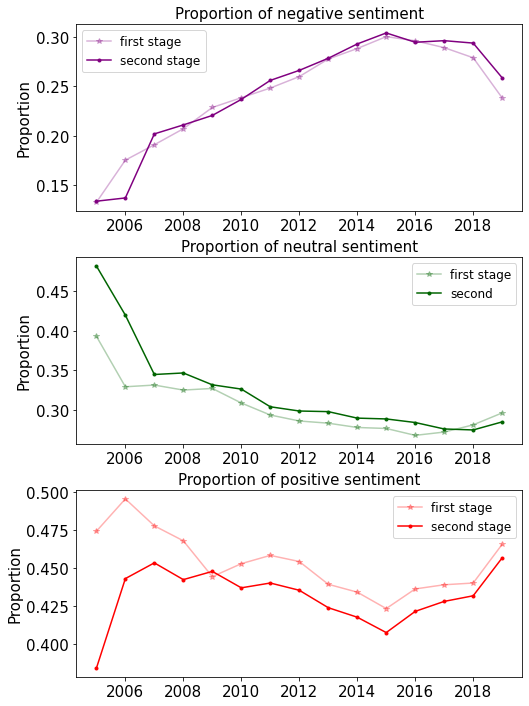

In [ ]:
fig, axes = plt.subplots(3)
plt.subplots_adjust(hspace=0.25)
fig.set_size_inches(8, 12)

axes[0].plot(x, df_user_first.loc['negative_portion', :],
        color='purple', label='first stage', marker='*', alpha=0.3)
axes[0].plot(x, df_user_second.loc['negative_portion', :],
        color='purple', label='second stage', marker='.')
axes[0].set_title("Proportion of negative sentiment", fontsize=15)
axes[0].set_ylabel('Proportion',fontsize=15)
axes[0].set_xticks(range(2006, 2020, 2))
axes[0].tick_params(labelsize=15)
axes[0].legend(fontsize=12)

axes[1].plot(x, df_user_first.loc['neutral_portion', :],
        color='darkgreen', label='first stage', marker='*', alpha=0.3)
axes[1].plot(x, df_user_second.loc['neutral_portion', :],
        color='darkgreen', label='second', marker='.')
axes[1].set_title("Proportion of neutral sentiment", fontsize=15)
axes[1].set_ylabel('Proportion', fontsize=15)
axes[1].set_xticks(range(2006, 2020, 2))
axes[1].tick_params(labelsize=15)
axes[1].legend(fontsize=12)

axes[2].plot(x, df_user_first.loc['positive_portion', :],
        color='red', label='first stage', marker='*', alpha=0.3)
axes[2].plot(x, df_user_second.loc['positive_portion', :],
        color='red', label='second stage', marker='.')
axes[2].set_title("Proportion of positive sentiment", fontsize=15)
axes[2].set_ylabel('Proportion', fontsize=15)
axes[2].set_xticks(range(2006, 2020, 2))
axes[2].tick_params(labelsize=15)
axes[2].legend(fontsize=12)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/sentiment_proprotion_between_stages_aggregate.png')

#### Sentiment polarization of all users

The paper from Nature scientific report also defined a metric to identity sentiment polarization. 

$$ 
  \rho_{\sigma}(i) = \frac{(N_i -2k_i - h_i)(N_i - h_i)}{N_i^2}
$$

In [ ]:
comments_user

,movie_id,rating,content,user_md5,votes,label,pred_label,pred_score,adjusted_pred,year,active_state,stage
comment_time,,,,,,,,,,,,
2005-06-12 02:22:07,1291581,4.0,平安夜跟小白看了粤语版，驴子的台词再创造得很可爱。,4d69f002306f819034976e3818a84908,6,1,1,0.979538,1,2005,active,first stage
2005-06-12 02:22:07,1291856,4.0,http://www.bighead.cn/?p=15,4d69f002306f819034976e3818a84908,19,1,1,0.777176,0,2005,active,first stage
2005-06-12 02:22:07,1291582,5.0,20061118跟小白重看了一遍。,4d69f002306f819034976e3818a84908,0,1,1,0.942424,1,2005,active,first stage
2005-06-12 02:22:07,1291832,5.0,我爱特拉沃塔的舞。,4d69f002306f819034976e3818a84908,1590,1,1,0.967151,1,2005,active,first stage
2005-06-12 02:22:09,1292210,4.0,重看依然很喜欢很喜欢,6c0f657ba0d8600e45f323e65a8de516,0,1,1,0.996046,1,2005,active,first stage
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-07 15:57:07,27063867,2.0,就很尬，很无聊，笑点好无语，朱亚文为什么要接这样的片子啊………,79a5045cc0cce798c046b84a56578d6d,0,0,0,0.997945,-1,2019,less active,second stage
2019-09-07 15:58:03,27063867,2.0,吃了感冒药去看的，困上加困。朱亚文是想通过这部作品来拓宽戏路吗？,fed2dab59d6797ad2c3838091a1288b8,0,0,0,0.994440,-1,2019,less active,second stage
2019-09-07 15:58:51,27063867,2.0,有些地方还是很好笑的，奔着两位主演去看，他们也确实有范儿，倒数第二场戏，两人穿礼服去办公室真...,32b9368b0d6edac78eed1049434f765b,0,0,0,0.853904,-1,2019,active,second stage


In [ ]:
user_polar_all = {}
for _, row in tqdm(comments_user.iterrows()):
    if row['user_md5'] not in user_polar_all:
        # all counts, positive, neutral and negative
        user_polar_all[row['user_md5']] = [user_dic[row['user_md5']], 0, 0, 0]
    
    if row['adjusted_pred'] == 1:
        user_polar_all[row['user_md5']][1] += 1 
    elif row['adjusted_pred'] == 0:
        user_polar_all[row['user_md5']][2] += 1
    else:
        user_polar_all[row['user_md5']][3] += 1  

4428452it [04:41, 15719.24it/s]


In [ ]:
users = []
total = []
polar_scores = []

for user, item in user_polar_all.items():
    users.append(user)
    total.append(item[0])
    polar_score = (item[0] - 2*item[3] - item[2])*(item[0] - item[2])/(item[0] ** 2)
    polar_scores.append(polar_score)
    
dic_for_reg_polar_all = {'user_md5':users,
                         'number_of_comments':total,
                         'user_sentiment_polarization':polar_scores}
df_user_polar_all = pd.DataFrame(dic_for_reg_polar_all)

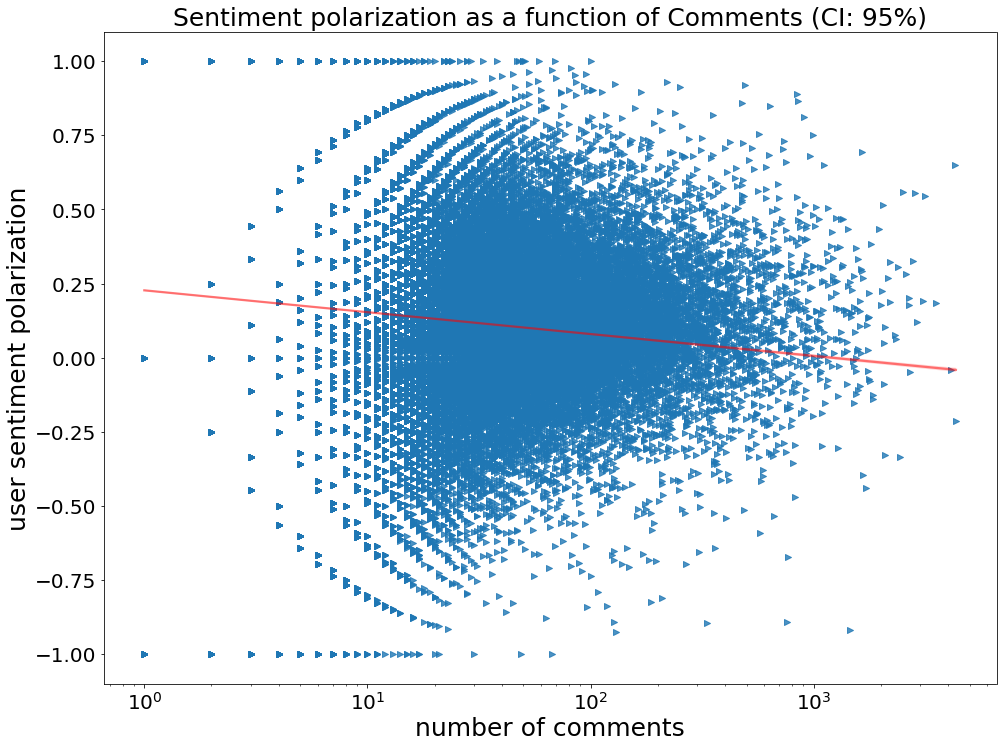

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.regplot(x='number_of_comments', 
            logx=True,
            y='user_sentiment_polarization', 
            data=df_user_polar_all,
            ci=95,
            fit_reg=True,
            scatter=True,
            label=True,
            line_kws={'color':'red',
                     'alpha':0.5},
            marker=">")
plt.title("Sentiment polarization as a function of Comments (CI: 95%)",fontsize=25)
plt.xscale('log')

plt.ylabel('user sentiment polarization',fontsize=25)
plt.xlabel('number of comments',fontsize=25)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/regression_of_sentiment_polarization_all.png')

In [ ]:
X = np.log(np.array(df_user_polar_all['number_of_comments'])).reshape(-1,1)
df_user_polar_all['log comments'] = X
est = sm.OLS(endog=df_user_polar_all['user_sentiment_polarization'], exog=sm.add_constant(df_user_polar_all['log comments'])).fit()

stargazer = Stargazer([est])
stargazer.show_model_numbers(False)
stargazer.significant_digits(3)
stargazer.show_confidence_intervals(True)
stargazer.show_degrees_of_freedom(False)
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable:}} \
\cr \cline{1-2}
\hline \\[-1.8ex]
 const & 0.227$^{***}$ \\
  & (0.225 , 0.229) \\
 log comments & -0.032$^{***}$ \\
  & (-0.034 , -0.031) \\
\hline \\[-1.8ex]
 Observations & 638,961 \\
 $R^2$ & 0.003 \\
 Adjusted $R^2$ & 0.003 \\
 Residual Std. Error & 0.675  \\
 F Statistic & 1742.818$^{***}$  \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Sentiment polarization of active users

In [ ]:
active_mask = (comments_user['active_state'] == 'active')
user_polar = {}
for _, row in tqdm(comments_user[active_mask].iterrows()):
    if row['user_md5'] not in user_polar:
        # all counts, positive, neutral and negative
        user_polar[row['user_md5']] = [user_dic[row['user_md5']], 0, 0, 0]
    
    if row['adjusted_pred'] == 1:
        user_polar[row['user_md5']][1] += 1 
    elif row['adjusted_pred'] == 0:
        user_polar[row['user_md5']][2] += 1
    else:
        user_polar[row['user_md5']][3] += 1  


users = []
total = []
polar_scores = []

for user, item in user_polar.items():
    users.append(user)
    total.append(item[0])
    polar_score = (item[0] - 2*item[3] - item[2])*(item[0] - item[2])/(item[0] ** 2)
    polar_scores.append(polar_score)
    
dic_for_reg_polar = {'user_md5':users,
                    'number_of_comments':total,
                    'user_sentiment_polarization':polar_scores}
df_user_polar = pd.DataFrame(dic_for_reg_polar)

2709854it [02:49, 15954.04it/s]


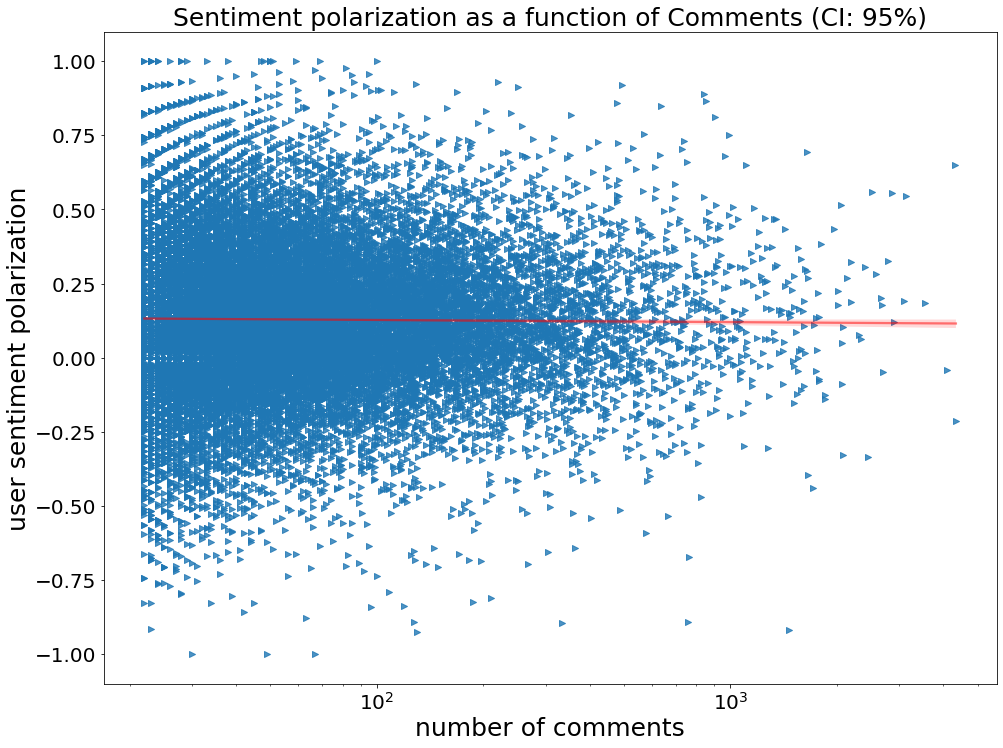

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.regplot(x='number_of_comments', 
            logx=True,
            y='user_sentiment_polarization', 
            data=df_user_polar,
            ci=95,
            fit_reg=True,
            scatter=True,
            label=True,
            line_kws={'color':'red',
                     'alpha':0.5},
            marker=">")
plt.title("Sentiment polarization as a function of Comments (CI: 95%)",fontsize=25)
plt.xscale('log')

plt.ylabel('user sentiment polarization',fontsize=25)
plt.xlabel('number of comments',fontsize=25)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/regression_of_sentiment_polarization_active.png')

In [ ]:
X = np.log(np.array(df_user_polar['number_of_comments'])).reshape(-1,1)
df_user_polar['log comments'] = X
est = sm.OLS(endog=df_user_polar['user_sentiment_polarization'], exog=sm.add_constant(df_user_polar['log comments'])).fit()

stargazer = Stargazer([est])
stargazer.show_model_numbers(False)
stargazer.significant_digits(3)
stargazer.show_confidence_intervals(True)
stargazer.show_degrees_of_freedom(False)
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable:}} \
\cr \cline{1-2}
\hline \\[-1.8ex]
 const & 0.142$^{***}$ \\
  & (0.129 , 0.155) \\
 log comments & -0.003$^{*}$ \\
  & (-0.006 , 0.000) \\
\hline \\[-1.8ex]
 Observations & 32,464 \\
 $R^2$ & 0.000 \\
 Adjusted $R^2$ & 0.000 \\
 Residual Std. Error & 0.232  \\
 F Statistic & 3.745$^{*}$  \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Check influence of web design change and influence of new users

In [ ]:
comments['comment_time'] = pd.to_datetime(comments['comment_time'])
comments = comments.set_index('comment_time').sort_index()
comments.head()

,movie_id,rating,content,user_md5,votes,label,pred_label,pred_score,adjusted_pred,year
comment_time,,,,,,,,,,
2005-06-12 02:22:07,1291581,4.0,平安夜跟小白看了粤语版，驴子的台词再创造得很可爱。,4d69f002306f819034976e3818a84908,6,1,1,0.979538,1,2005
2005-06-12 02:22:07,1291856,4.0,http://www.bighead.cn/?p=15,4d69f002306f819034976e3818a84908,19,1,1,0.777176,0,2005
2005-06-12 02:22:07,1291582,5.0,20061118跟小白重看了一遍。,4d69f002306f819034976e3818a84908,0,1,1,0.942424,1,2005
2005-06-12 02:22:07,1291832,5.0,我爱特拉沃塔的舞。,4d69f002306f819034976e3818a84908,1590,1,1,0.967151,1,2005
2005-06-12 02:22:09,1292210,4.0,重看依然很喜欢很喜欢,6c0f657ba0d8600e45f323e65a8de516,0,1,1,0.996046,1,2005


#### Change of webdesign: upvotes.

##### 3 months

In [ ]:
counter_before = comments['2009-02-16':'2009-04-01']
counter_after = comments['2009-04-02':'2009-05-16']

real_before = comments['2009-06-06':'2009-07-20']
real_after = comments['2009-07-21':'2009-09-03']

In [ ]:
# counterfactual before
day_num, sent_polar_lst = cal_sentiment_polarization_by_day(counter_before)
dic_for_counter_before = {'day':range(-day_num, 0), 
                         'sentiment polarization':sent_polar_lst}
df_for_counter_before = pd.DataFrame(dic_for_counter_before)

# counterfactual after
day_num, sent_polar_lst = cal_sentiment_polarization_by_day(counter_after)
dic_for_counter_after = {'day':range(0, day_num), 
                         'sentiment polarization':sent_polar_lst}
df_for_counter_after = pd.DataFrame(dic_for_counter_after)

# real event before
day_num, sent_polar_lst = cal_sentiment_polarization_by_day(real_before)
dic_for_real_before = {'day':range(-day_num, 0), 
                         'sentiment polarization':sent_polar_lst}
df_for_real_before = pd.DataFrame(dic_for_real_before)

# real event after
day_num, sent_polar_lst = cal_sentiment_polarization_by_day(real_after)
dic_for_real_after = {'day':range(0, day_num), 
                         'sentiment polarization':sent_polar_lst}
df_for_real_after = pd.DataFrame(dic_for_real_after)


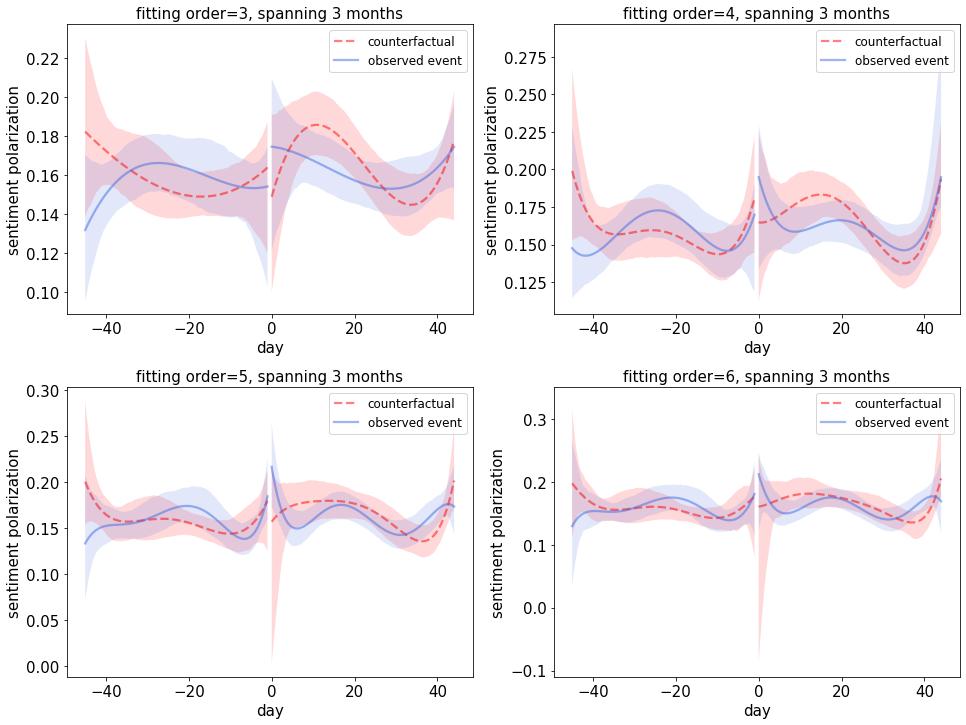

In [ ]:
fig, axes = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.25)
fig.set_size_inches(16, 12)
for i in range(2):
  for j in range(2):
    if i==0:
      if j == 0:
        order = 3
      else:
        order = 4
    else:
      if j == 0:
        order = 5
      else:
        order = 6
    
    # counterfactual 
    sns.regplot(x='day', 
                y='sentiment polarization', 
                data=df_for_counter_before,
                ci=95,
                order=order,
                fit_reg=True,
                scatter=False,
                ax=axes[i][j],
                label='counterfactual',
                line_kws={'color':'red',
                        'alpha':0.5,
                          'linestyle':'--'
                          })

    axes[i][j] = sns.regplot(x='day', 
                y='sentiment polarization', 
                data=df_for_counter_after,
                ci=95,
                order=order,
                fit_reg=True,
                scatter=False,
                ax=axes[i][j],
                line_kws={'color':'red',
                        'alpha':0.5,
                          'linestyle':'--'})

    # real 
    axes[i][j] = sns.regplot(x='day', 
                y='sentiment polarization', 
                data=df_for_real_before,
                ci=95,
                order=order,
                fit_reg=True,
                scatter=False,
                label='observed event',
                ax=axes[i][j],
                line_kws={'color':'royalblue',
                        'alpha':0.5,
                          'linestyle':'-'
                          })

    axes[i][j] = sns.regplot(x='day', 
                y='sentiment polarization', 
                data=df_for_real_after,
                ci=95,
                order=order,
                fit_reg=True,
                scatter=False,
                ax=axes[i][j],
                line_kws={'color':'royalblue',
                        'alpha':0.5,
                          'linestyle':'-'})
    
    axes[i][j].set_title("fitting order={}, spanning 3 months".format(order),fontsize=15)
    axes[i][j].set_ylabel('sentiment polarization',fontsize=15)
    axes[i][j].set_xlabel('day',fontsize=15)
    axes[i][j].tick_params(labelsize=15)
    axes[i][j].legend(fontsize=12)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/rdd_upvotes_3mo.png')

#### Influence of new users

##### mean sentiment vs. proportion of comments from new users by week

In [ ]:
sentiment_mean = comments['adjusted_pred'].resample('W') \
 .mean()

In [ ]:
comments_num = comments['adjusted_pred'].resample('W') \
 .count()

In [ ]:
sent_comm = pd.DataFrame({'sentiment_mean':sentiment_mean, 'comments_num': comments_num})
sent_comm

,sentiment_mean,comments_num
comment_time,,
2005-06-12,0.454545,11
2005-06-19,0.285714,7
2005-06-26,1.000000,5
2005-07-03,0.258621,58
2005-07-10,0.236686,169
...,...,...
2019-08-11,0.265927,41534
2019-08-18,0.291706,47092
2019-08-25,0.305485,56592


In [ ]:
new_user_by_week = []
comments_from_new_user_by_week = []
comments_from_old_user_by_week = []
user_set = set()

for time, item in tqdm(comments.resample('W')):
  new_user = set()
  comments_from_new_user = 0
  comments_from_old_user = 0
  # comments in each month
  for idx, row in item.iterrows():
    if row['user_md5'] not in user_set:
      new_user.add(row['user_md5'])
      comments_from_new_user += 1
    else:
      comments_from_old_user += 1
  new_user_by_week.append(len(new_user))
  comments_from_new_user_by_week.append(comments_from_new_user)
  comments_from_old_user_by_week.append(comments_from_old_user)
  user_set = user_set.union(new_user)

100%|██████████| 744/744 [04:04<00:00,  3.04it/s]


In [ ]:
user_comments_week_df = pd.DataFrame({'new users': new_user_by_week,
                                       'new comments': comments_from_new_user_by_week,
                                       'old comments': comments_from_old_user_by_week})

In [ ]:
new_comments_portion = user_comments_week_df['new comments']/(user_comments_week_df['new comments'] + user_comments_week_df['old comments'])

In [ ]:
sent_comm['comments_from_new_users_proportion'] = new_comments_portion.values

In [ ]:
comm_mask_new = (sent_comm['comments_from_new_users_proportion'] <=0.4)

sent_mask = (sent_comm_change['sentiment_change'] <=0.5)

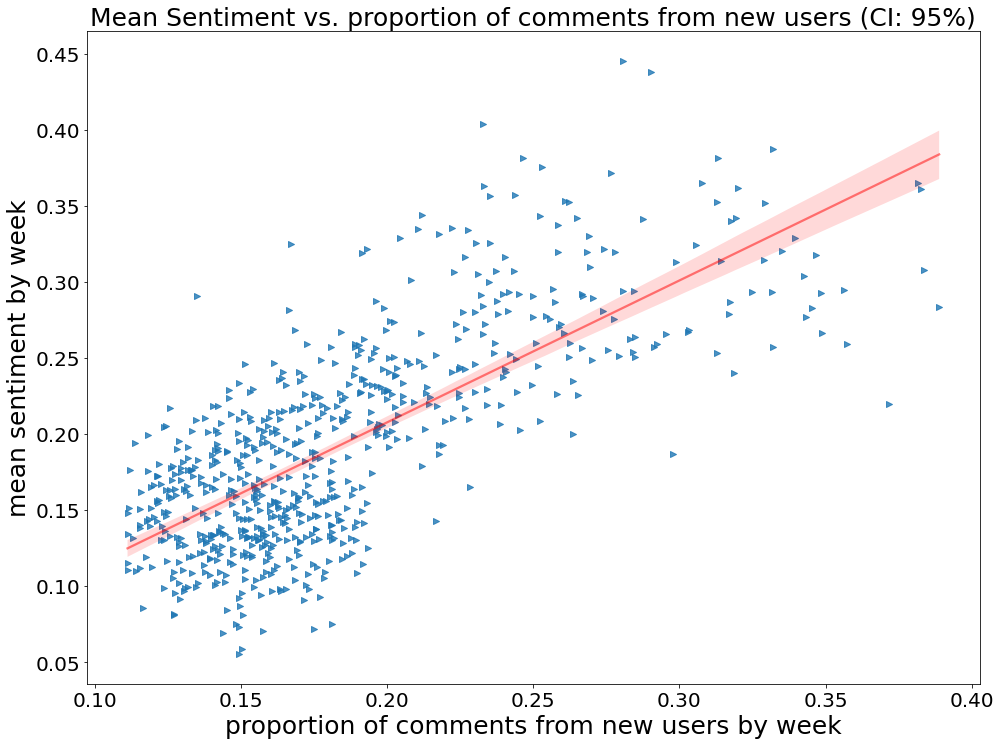

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)
sns.regplot(x='comments_from_new_users_proportion', 
            y='sentiment_mean', 
            data=sent_comm[comm_mask_new & sent_mask],
            ci=95,
            fit_reg=True,
            scatter=True,
            label=True,
            robust=True,
            line_kws={'color':'red',
                     'alpha':0.5},
            marker=">")
plt.title("Mean Sentiment vs. proportion of comments from new users (CI: 95%)",fontsize=25)
plt.ylabel('mean sentiment by week',fontsize=25)
plt.xlabel('proportion of comments from new users by week',fontsize=25)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/regression_of_proportion_of_new_comments_mean_sentiment.png')

In [ ]:
est = sm.OLS(endog=sent_comm[comm_mask_new & sent_mask]['sentiment_mean'], 
             exog=sm.add_constant(sent_comm[comm_mask_new & sent_mask]['comments_from_new_users_proportion'])).fit()

stargazer = Stargazer([est])
stargazer.show_model_numbers(False)
stargazer.significant_digits(3)
stargazer.show_confidence_intervals(True)
stargazer.show_degrees_of_freedom(False)
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{1}{c}{\textit{Dependent variable:}} \
\cr \cline{1-2}
\hline \\[-1.8ex]
 comments_from_new_users_proportion & 0.943$^{***}$ \\
  & (0.878 , 1.008) \\
 const & 0.020$^{***}$ \\
  & (0.008 , 0.033) \\
\hline \\[-1.8ex]
 Observations & 693 \\
 $R^2$ & 0.543 \\
 Adjusted $R^2$ & 0.542 \\
 Residual Std. Error & 0.047  \\
 F Statistic & 820.619$^{***}$  \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\
\end{tabular}
\end{table}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


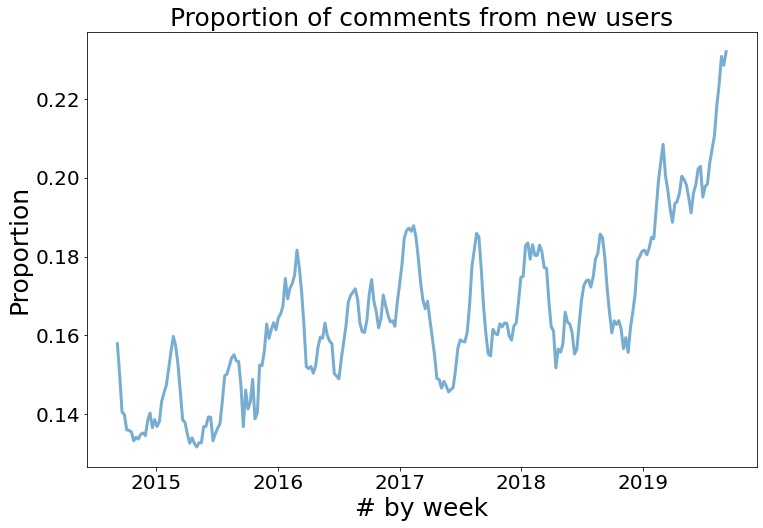

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(sent_comm.index[479:], sent_comm.iloc[479:]['comments_from_new_users_proportion'].rolling(4).mean(), linewidth=3, alpha=0.6)
plt.title("Proportion of comments from new users", fontsize=25)
plt.ylabel('Proportion',fontsize=25)
plt.xlabel('# by week',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/30200_analysis/results_sentiment/proportion_of_new_comments_2014_2019.png') 